In [1]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, OPTICS, MeanShift, AgglomerativeClustering, estimate_bandwidth, Birch
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib
#matplotlib.use("Agg")
import matplotlib.pyplot as plt
import pandas as pd
from time import time
import random

In [2]:
def cluster_number(data: pd.DataFrame, num_cluster: int):
    cluster = []
    for i in range(num_cluster):
        cluster_i = data[data.cluster==i]
        cluster_i = cluster_i.drop(columns="cluster")
        cluster.append(cluster_i)

    return cluster

t0 = time()
x = np.load('gnr_edge-7cm.npz')["x"]
name = np.load('gnr_edge-7cm.npz')["name"]
pca = PCA(n_components=100, random_state=0).fit(x)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
x_train = pca.transform(x)
for i in range(0, 100, 10):
    print("PC", i, round(cumulative_variance[i]*100, 3), "%")
print(x_train.shape)
print("Elapsed time: ", time()-t0)

# print(f"x (train): {x_train.shape}")
# print(f"x (test): {x_test.shape}")


PC 0 41.927 %
PC 10 76.81 %
PC 20 85.288 %
PC 30 89.708 %
PC 40 92.183 %
PC 50 93.787 %
PC 60 94.897 %
PC 70 95.723 %
PC 80 96.378 %
PC 90 96.908 %
(92565, 100)
Elapsed time:  27.372885704040527


In [3]:
t0 = time()
#bandwith_cal = estimate_bandwidth(X=x_train[:20000], n_jobs=-1)
dbscan_cluster = Birch(threshold=0.01, n_clusters=None).fit(x_train)
print(metrics.silhouette_score(x_train, dbscan_cluster.labels_))
print("Elapsed time: ", time()-t0)



0.14199990361659093
Elapsed time:  97.59418416023254


Number of clusters 15
Cluster 0: 7256
Cluster 1: 4678
Cluster 2: 8021
Cluster 3: 4253
Cluster 4: 3395
Cluster 5: 4348
Cluster 6: 7150
Cluster 7: 2849
Cluster 8: 5581
Cluster 9: 8346
Cluster 10: 4831
Cluster 11: 8388
Cluster 12: 6113
Cluster 13: 2247
Cluster 14: 5422
Cluster -1: 9687


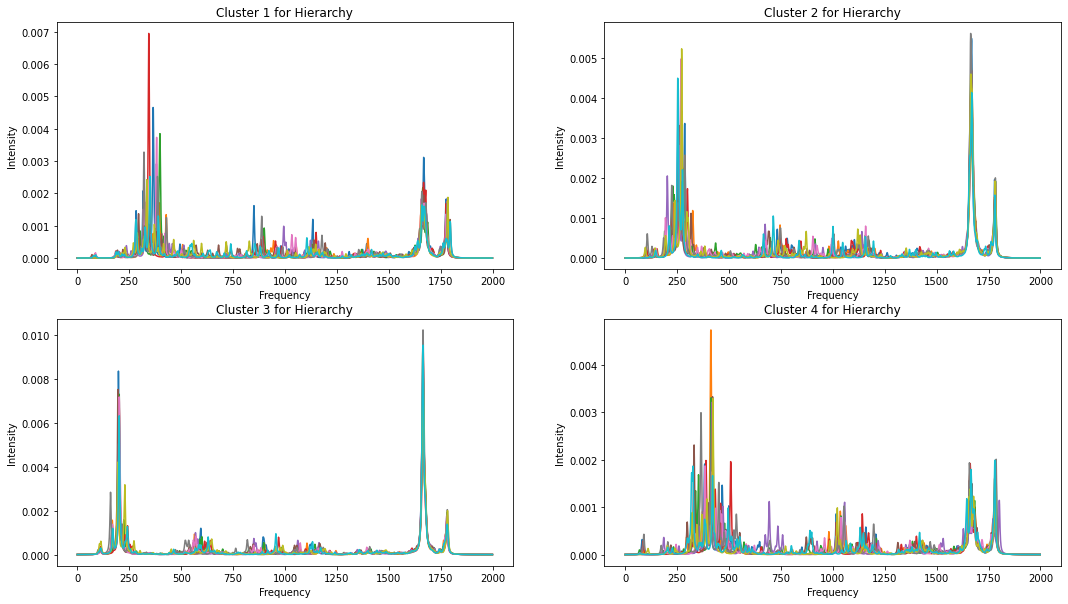

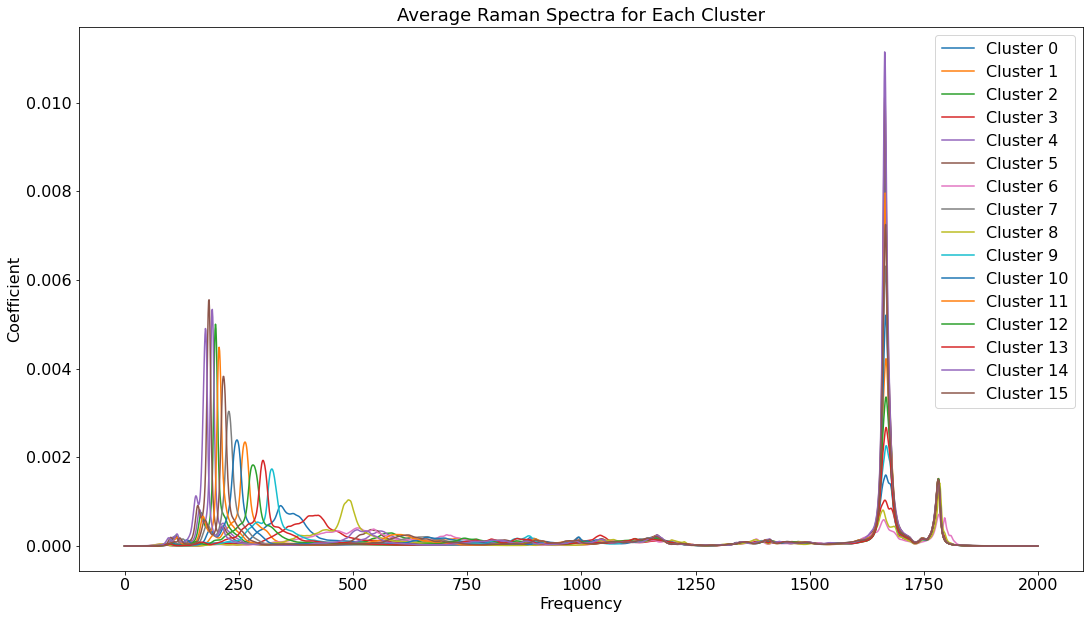

In [4]:
x_df = pd.DataFrame(x)
x_df["cluster"] = dbscan_cluster.labels_
num_cluster, counts = np.unique(dbscan_cluster.labels_, return_counts=True)
print("Number of clusters", num_cluster.size-1)

all_cluster = cluster_number(data = x_df, num_cluster = num_cluster.size)
for i in range(num_cluster.size-1):
    print(f"Cluster {i}: {counts[i+1]}")
print(f"Cluster -1: {counts[0]}")
#print(metrics.silhouette_score(x_train, dbscan_cluster.labels_))

fig, axs = plt.subplots(2, 2, figsize=(18,10))
frequency = np.array(range(0, 2000))
for i in range(0, 10):
    axs[0, 0].plot(frequency, np.array(all_cluster[0].iloc[random.randint(0, all_cluster[0].shape[0]-1),:]))
    axs[0, 1].plot(frequency, np.array(all_cluster[1].iloc[random.randint(0, all_cluster[1].shape[0]-1),:]))
    axs[1, 0].plot(frequency, np.array(all_cluster[2].iloc[random.randint(0, all_cluster[2].shape[0]-1),:]))
    axs[1, 1].plot(frequency, np.array(all_cluster[3].iloc[random.randint(0, all_cluster[3].shape[0]-1),:]))
axs[0, 0].set_title("Cluster 1 for Hierarchy")   
axs[0, 1].set_title("Cluster 2 for Hierarchy")
axs[1, 0].set_title("Cluster 3 for Hierarchy")
axs[1, 1].set_title("Cluster 4 for Hierarchy")
for ax in axs.flat:
    ax.set(xlabel='Frequency', ylabel='Intensity')

fig1 = plt.figure(figsize=(18, 10))
for i in range(num_cluster.size):
    cluster_i = np.array(all_cluster[i])
    plt.plot(frequency, np.mean(a=cluster_i, axis=0), label=f"Cluster {i}")
plt.ylabel('Coefficient', fontsize = 16)
plt.xlabel('Frequency', fontsize = 16)
plt.title("Average Raman Spectra for Each Cluster", fontsize=18)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.legend(fontsize = 16)

0.11769757876656951
Elapsed time:  1955.463049173355
Number of clusters 15
Cluster 0: 5415
Cluster 1: 12645
Cluster 2: 8639
Cluster 3: 5910
Cluster 4: 5640
Cluster 5: 3239
Cluster 6: 2683
Cluster 7: 10306
Cluster 8: 11507
Cluster 9: 2068
Cluster 10: 4380
Cluster 11: 6143
Cluster 12: 9310
Cluster 13: 2981
Cluster 14: 1699


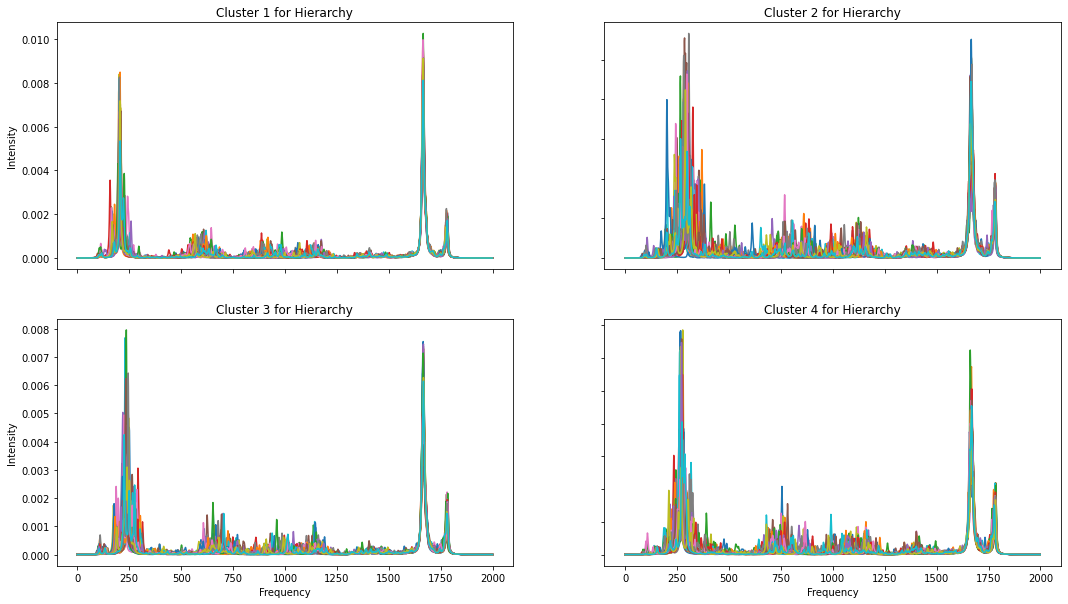

In [3]:
t0 = time()
hierarchy_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5).fit(x_train)
print(metrics.silhouette_score(x_train, hierarchy_cluster.labels_))
print("Elapsed time: ", time()-t0)

x_df = pd.DataFrame(x)
x_df["cluster"] = hierarchy_cluster.labels_
num_cluster = np.unique(hierarchy_cluster.labels_).size
print("Number of clusters", num_cluster)

all_cluster = cluster_number(data = x_df, num_cluster = num_cluster)
for i in range(num_cluster):
    print(f"Cluster {i}: {all_cluster[i].shape[0]}")

fig, axs = plt.subplots(2, 2, figsize=(18,10))
frequency = np.array(range(0, 2000))
for i in range(0, 50):
    axs[0, 0].plot(frequency, np.array(all_cluster[0].iloc[random.randint(0, all_cluster[0].shape[0]-1),:]))
    axs[0, 1].plot(frequency, np.array(all_cluster[1].iloc[random.randint(0, all_cluster[1].shape[0]-1),:]))
    axs[1, 0].plot(frequency, np.array(all_cluster[2].iloc[random.randint(0, all_cluster[2].shape[0]-1),:]))
    axs[1, 1].plot(frequency, np.array(all_cluster[3].iloc[random.randint(0, all_cluster[3].shape[0]-1),:]))
axs[0, 0].set_title("Cluster 1 for Hierarchy")   
axs[0, 1].set_title("Cluster 2 for Hierarchy")
axs[1, 0].set_title("Cluster 3 for Hierarchy")
axs[1, 1].set_title("Cluster 4 for Hierarchy")
for ax in axs.flat:
    ax.set(xlabel='Frequency', ylabel='Intensity')
for ax in axs.flat:
    ax.label_outer()

14.89359334898846
11.17649533239146
9.484212561822172
8.487625895969813
7.81766117355311
7.341209068694256
6.983045423635051
6.701395280544079
6.461955961085304
6.269917132507035


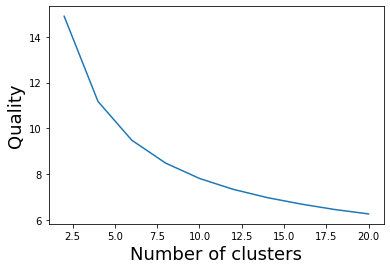

In [5]:
def kmeans_quality(data: np.ndarray, nc: int):
    quality = np.zeros(nc)
    for i in range(1, nc+1):
        kmeans = KMeans(n_clusters=i*2, random_state=0).fit(data)
        print(kmeans.inertia_)
        quality[i-1] = kmeans.inertia_
    
    plt.plot(np.array(range(2, (nc+1)*2, 2)), quality)
    plt.ylabel('Quality', fontsize = 18)
    plt.xlabel('Number of clusters', fontsize = 18)
    plt.show()

kmeans_quality(x_train, 10)


In [4]:
t0 = time()
num_cluster = 10
kmeans = KMeans(n_clusters=num_cluster, random_state=0, n_jobs=-1).fit(x_train)
print(metrics.silhouette_score(X=x_train, labels=kmeans.labels_))
print("Elapsed time: ", time()-t0)

0.17815136115492264
Elapsed time:  98.2134599685669


Cluster 0: 8524
Cluster 1: 13239
Cluster 2: 5211
Cluster 3: 18019
Cluster 4: 4435
Cluster 5: 6880
Cluster 6: 16726
Cluster 7: 3748
Cluster 8: 5886
Cluster 9: 9897
Cluster 0: 3734
Cluster 1: 6811
Cluster 2: 8607
Cluster 3: 3675
Cluster 4: 4847
Cluster 5: 3637
Cluster 6: 4550
Cluster 7: 3796
Cluster 8: 3991
Cluster 9: 4336


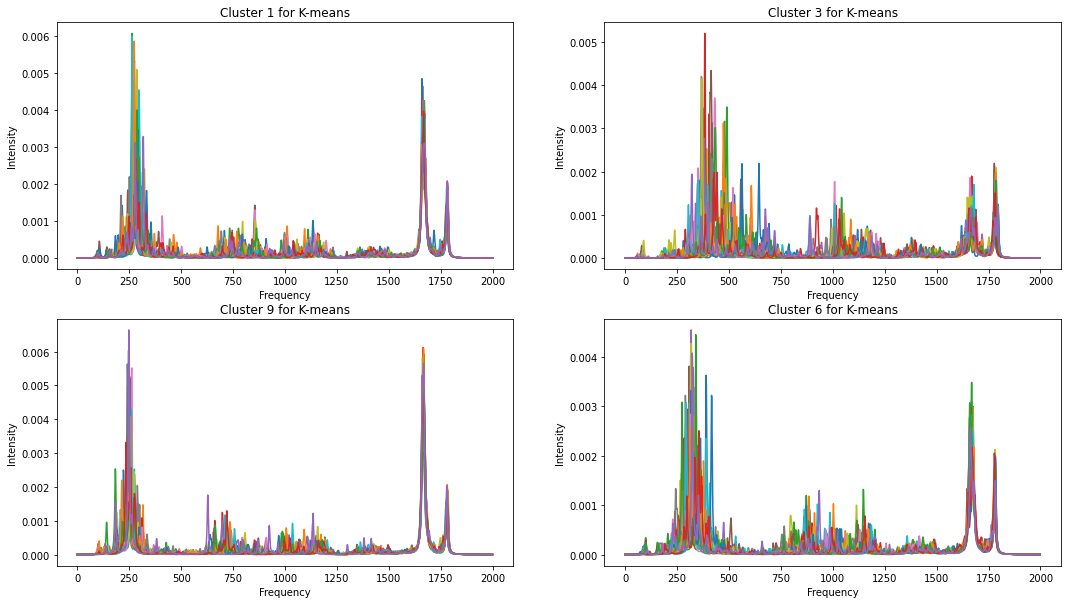

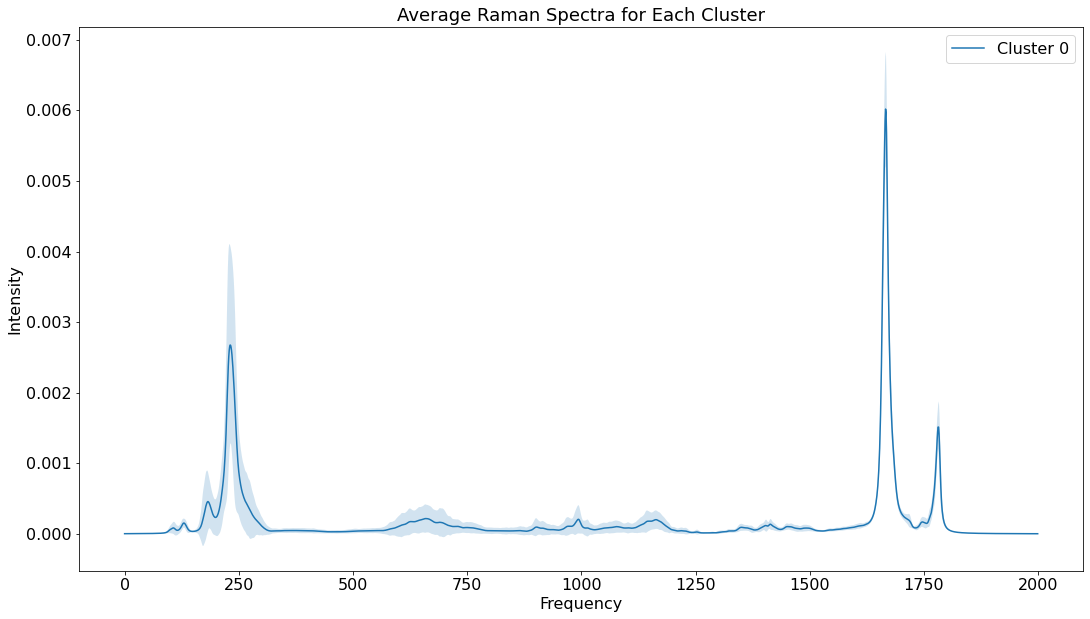

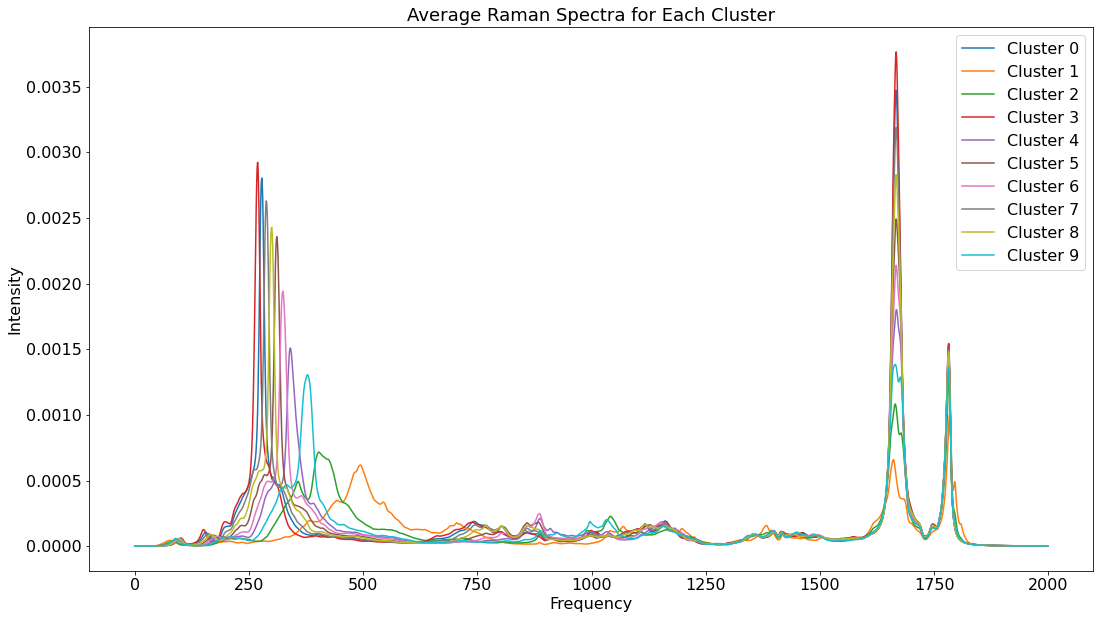

In [8]:
x_df = pd.DataFrame(data=x)
x_df["cluster"] = kmeans.labels_

all_cluster = cluster_number(data = x_df, num_cluster = num_cluster)
for i in range(num_cluster):
    print(f"Cluster {i}: {all_cluster[i].shape[0]}")

random.seed(0)

# x_df["name"] = name
# for i in range(num_cluster):
#     cluster_i = x_df[x_df["cluster"]==i]
#     print(f"\nCluster {i}:")
#     for j in range(0, 8):
#         print(list(cluster_i["name"])[random.randint(0, cluster_i.shape[0]-1)], end=" ")

fig, axs = plt.subplots(2, 2, figsize=(18,10))
frequency = np.array(range(0, 2000))
for i in range(0, 25):
    axs[0, 0].plot(frequency, np.array(all_cluster[1].iloc[random.randint(0, all_cluster[1].shape[0]-1),:]))
    axs[0, 1].plot(frequency, np.array(all_cluster[3].iloc[random.randint(0, all_cluster[3].shape[0]-1),:]))
    axs[1, 0].plot(frequency, np.array(all_cluster[9].iloc[random.randint(0, all_cluster[9].shape[0]-1),:]))
    axs[1, 1].plot(frequency, np.array(all_cluster[6].iloc[random.randint(0, all_cluster[6].shape[0]-1),:]))
axs[0, 0].set_title("Cluster 1 for K-means")
axs[0, 1].set_title("Cluster 3 for K-means")
axs[1, 0].set_title("Cluster 9 for K-means")
axs[1, 1].set_title("Cluster 6 for K-means")
for ax in axs.flat:
    ax.set(xlabel='Frequency', ylabel='Intensity')

fig1 = plt.figure(figsize=(18, 10))
for i in range(1):
    cluster_i = np.array(all_cluster[i])
    mean = np.mean(a=cluster_i, axis=0)
    variance = np.std(a=cluster_i, axis=0)
    plt.plot(frequency, mean, label=f"Cluster {i}")
    plt.fill_between(x=frequency, y1=mean-variance, y2=mean+variance, alpha=0.2)
plt.ylabel('Intensity', fontsize = 16)
plt.xlabel('Frequency', fontsize = 16)
plt.title("Average Raman Spectra for Each Cluster", fontsize=18)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.legend(fontsize = 16)
#plt.xlim(1600, 1750)

combined_cluster = x_df.loc[x_df["cluster"].isin([2, 4, 7, 8])]
noise_cluster = x_df.loc[x_df["cluster"].isin([1, 6, 3])]
x_noise_train = x_train[noise_cluster.index.values]
kmeans_1 = KMeans(n_clusters=num_cluster, random_state=0, n_jobs=-1).fit(x_noise_train)
noise_cluster["cluster"] = kmeans_1.labels_

all_cluster = cluster_number(data = noise_cluster, num_cluster = num_cluster)
for i in range(num_cluster):
    print(f"Cluster {i}: {all_cluster[i].shape[0]}")

fig2 = plt.figure(figsize=(18, 10))
for i in range(num_cluster):
    cluster_i = np.array(all_cluster[i])
    plt.plot(frequency, np.mean(a=cluster_i, axis=0), label=f"Cluster {i}")
plt.ylabel('Intensity', fontsize = 16)
plt.xlabel('Frequency', fontsize = 16)
plt.title("Average Raman Spectra for Each Cluster", fontsize=18)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.legend(fontsize = 16)


# x_heat = np.tile(A=frequency/200000, reps=all_cluster[0].shape[0])
# y_heat = np.array(all_cluster[0]).flatten()
# heatmap, xedges, yedges = np.histogram2d(x=x_heat, y=y_heat, bins=2000)
# extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
# plt.imshow(heatmap.T, extent=extent)
# plt.show()
    